In [1]:
import pandas as pd
import numpy as np
import spacy

# Import all functions from utils
from utils.utils import *

In [2]:
dicts = load_vectors_as_dict("data/glove.840B.300d.snli_pruned.txt")

In [3]:
dicts

{'NULL': array([ 2.720e-01,  1.305e+00, -2.270e-01,  3.100e-02,  1.014e+00,
         1.154e+00,  1.690e-01,  1.638e+00, -2.600e-02, -5.500e-02,
        -7.170e-01, -1.066e+00, -1.880e-01, -8.160e-01,  2.390e+00,
         1.394e+00, -1.164e+00,  4.840e-01,  9.400e-02,  1.650e-01,
         4.740e-01, -4.180e-01,  1.540e+00,  1.800e-02,  9.790e-01,
        -1.396e+00, -9.510e-01,  7.000e-03,  1.276e+00, -2.320e-01,
        -5.410e-01, -3.190e-01, -1.407e+00,  1.519e+00,  1.249e+00,
         1.478e+00, -1.000e+00,  9.230e-01, -1.375e+00, -1.233e+00,
         6.860e-01, -1.470e-01,  4.860e-01, -9.000e-03, -8.160e-01,
         6.550e-01, -6.420e-01,  1.476e+00, -2.278e+00, -6.370e-01,
         9.470e-01, -1.466e+00, -7.700e-02,  1.621e+00, -5.100e-01,
         3.440e-01,  1.500e-02,  5.750e-01,  1.369e+00,  4.440e-01,
         1.622e+00,  4.000e-02,  1.631e+00,  8.610e-01, -8.880e-01,
         6.020e-01, -8.290e-01,  9.000e-01,  3.000e-03,  9.730e-01,
         4.850e-01,  5.680e-01,  1.904e+

In [4]:
df_gtp3= pd.read_csv("data/gpt3/1/paraphraseGPT3.csv")

In [5]:
df_gtp3

Unnamed: 0     gold_label  \
0             3     entailment   
1            44     entailment   
2           154  contradiction   
3           242  contradiction   
4           319        neutral   
..          ...            ...   
168        6517        neutral   
169        6557        neutral   
170        6597  contradiction   
171        6642        neutral   
172        6682  contradiction   

                                             sentence1  \
0    A girl reaches up to kiss a cat, which is sitt...   
1    Woman running in a park while listening to music.   
2    An old woman and a young man examine their bin...   
3            Baby in running in over-sized flip-flops.   
4    A woman in a white wedding dress is being dres...   
..                                                 ...   
168    A family with young children sits down outside.   
169  Fireworks light up the night as a man stands o...   
170  A young middle eastern mother in high heels, h...   
171  People shopping for vegetables at an outdoor m...   
172         A moving truck with a ramp still attached.   

                                             sentence2   SET  Parafraseo   Idx  
0        A girl is displaying affection towards a cat.  TEST       False  3086  
1                        A woman is jogging in a park.  TEST       False  2022  
2    A young woman and an elderly man are engaged i...  TEST       False  6924  
3            A young boy is playing with a basketball.  TEST       False  1166  
4                   A woman has entered into marriage.  TEST       False  6791  
..                                                 ...   ...         ...   ...  
168  A man and his wife sit outside with their chil...  TEST       False  2335  
169               The man organizes a concert outside.  TEST       False  3100  
170  A woman holds her sleeping son while walking d...  TEST       False  1682  
171          People shop for veggies at a nice market.  TEST       False  2252  
172              A moving truck is being disassembled.  TEST       False  6931  

[173 rows x 7 columns]

In [6]:
df_gpt2 = pd.read_csv("data/gpt3/2/paraphraseGPT2.csv")
df_gpt2

Unnamed: 0     gold_label  \
0          6869        neutral   
1          6882        neutral   
2          6956  contradiction   
3          7038        neutral   
4          7053  contradiction   
..          ...            ...   
168       13501  contradiction   
169       13530        neutral   
170       13586  contradiction   
171       13616  contradiction   
172       13627        neutral   

                                             sentence1  \
0                A snowboarder on a wide plain of snow   
1    A child wearing a red top is standing behind a...   
2    A man and woman are taking a picture of themse...   
3    A man in an Alaska sweatshirt stands behind a ...   
4    Island native fishermen reeling in their nets ...   
..                                                 ...   
168  A woman in black walks down the street in fron...   
169  A golden dog bounds across the snow-covered hill.   
170  A man with glasses sitting at a restaurant sta...   
171  A white duck is spreading its wings while sitt...   
172  A older man in a hat is playing a accordion on...   

                                             sentence2   SET  Parafraseo   Idx  
0                            Anowmobile in a snowstorm  TEST        True    67  
1    A pretty blond child wearing a red top is stan...  TEST        True    85  
2    Two woman having mug shots taken of her while ...  TEST        True   186  
3                                     He is in Alaska.  TEST        True   312  
4    They bothmale did not go to work today but ins...  TEST        True   330  
..                                                 ...   ...         ...   ...  
168     Two woman standing staring at a painted mural.  TEST        True  9607  
169  A large animal bounds across a snow-covered pl...  TEST        True  9654  
170         The family sits at home waiting for dinner  TEST        True  9735  
171  Theck kept it's wings intact as they dived int...  TEST        True  9777  
172                       The master is wearing a hat.  TEST        True  9794  

[173 rows x 7 columns]

In [7]:
vocabulario_gpt2=set()
for index,strings in df_gpt2.iterrows():
    frase=strings["sentence2"].split()
    for f in frase:
        vocabulario_gpt2.add(f)
vocabulario_gpt3=set()
for index,strings in df_gtp3.iterrows():
    frase=strings["sentence2"].split()
    for f in frase:
        vocabulario_gpt3.add(f)

In [8]:
print(len(vocabulario_gpt2))
print(len(vocabulario_gpt3))

566
620


In [9]:
conteo_gpt2_n=0
conteo_gpt3_n=0
for e in vocabulario_gpt2:
    if e not in dicts:
        conteo_gpt2_n+=1
for e in vocabulario_gpt3:
    if e not in dicts:
        conteo_gpt3_n+=1

In [10]:
conteo_gpt2_n

160

In [ ]:
print(len)

In [11]:
conteo_gpt3_n

196

In [12]:
data=[566,160,620,196]


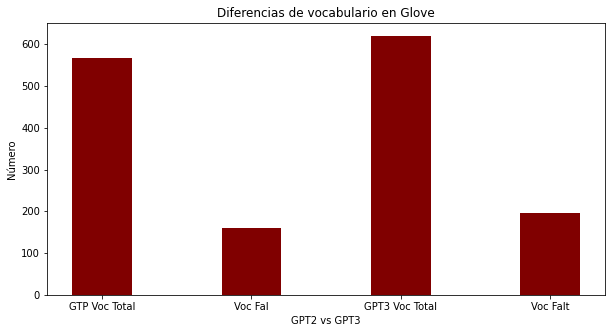

In [13]:
import numpy as np
import matplotlib.pyplot as plt
  
# creating the dataset
data = {'GTP Voc Total':566, 'Voc Fal':160, 'GPT3 Voc Total':620,
        'Voc Falt':196}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("GPT2 vs GPT3")
plt.ylabel("Número")
plt.title("Diferencias de vocabulario en Glove")
plt.show()